# Importing the libraries and loading the dataset

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('Churn_Modelling.csv')

In [21]:
dframe = pd.DataFrame(df)
dframe.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Performing the visualizations

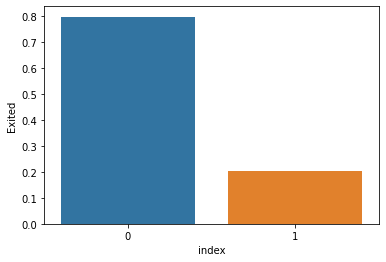

In [13]:
depth = dframe['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=depth,x='index',y='Exited')

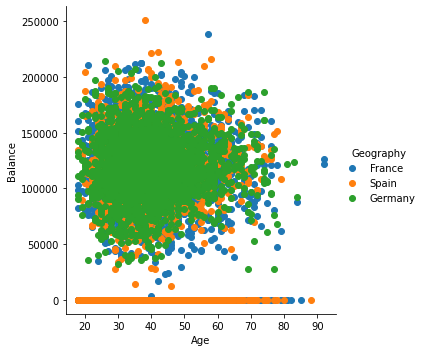

In [14]:
sns.FacetGrid(df,hue="Geography",height=5).map(plt.scatter,"Age","Balance").add_legend();
plt.show()

In [ ]:
sns.pairplot(df,hue="Gender",height=3)


# Descriptive Statistics

In [6]:
dframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
dframe.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

# Handling and checking for any missing values

In [9]:
dframe.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Finding the outliers and replacing the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


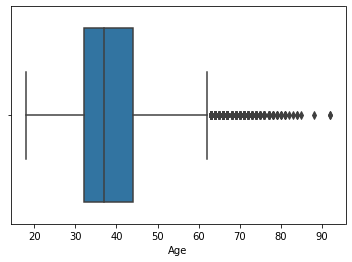

In [10]:
sns.boxplot(df['Age'])


In [11]:
df['Age'].mean()


38.9218

In [12]:
df['Age'] = np.where(df['Age'] > 57, 39, df['Age']) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


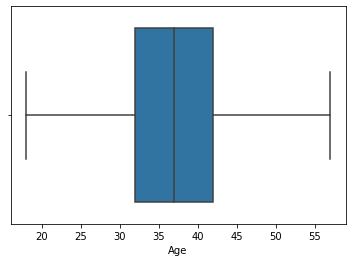

In [13]:
sns.boxplot(df['Age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


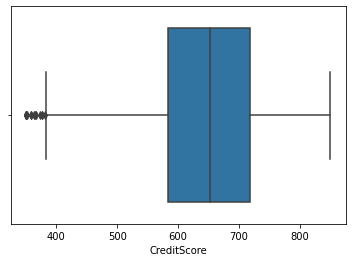

In [14]:
sns.boxplot(df['CreditScore'])


In [15]:
df['CreditScore'].mean()


650.5288

In [16]:
df['CreditScore'] = np.where(df['CreditScore'] < 400, 650, df['CreditScore']) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


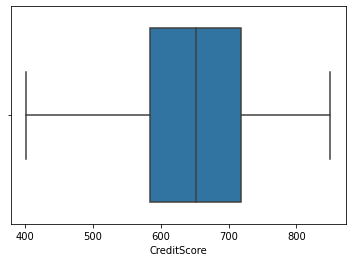

In [17]:
sns.boxplot(df['CreditScore'])


# Encoding

In [47]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Dependent vs Independent Variable Split

In [48]:
x = df.iloc[:, 0:10]


In [49]:
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [50]:
y = df['Exited']


In [51]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Scaling the independant variables


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)


In [53]:
x_scaled


array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Splitting into training and testing

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0) 

In [55]:
x_train.shape


(7000, 10)

In [56]:
x_train


array([[-0.09859236, -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255, -0.77021814],
       [-1.13326993, -0.90188624,  0.91241915, ...,  0.64609167,
        -1.03067011, -1.39576675],
       [-0.62627792, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.49965629],
       ...,
       [ 0.90504489, -0.90188624,  0.91241915, ...,  0.64609167,
        -1.03067011,  1.41441489],
       [-0.62627792,  1.51506738, -1.09598752, ...,  0.64609167,
         0.97024255,  0.84614739],
       [-0.28483432,  0.30659057, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.32630495]])

In [57]:
x_test.shape


(3000, 10)

In [58]:
x_test


array([[-0.55385049,  0.30659057, -1.09598752, ...,  0.64609167,
         0.97024255,  1.61304597],
       [-1.31951189, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.49753166],
       [ 0.57394806,  1.51506738, -1.09598752, ...,  0.64609167,
         0.97024255, -0.4235611 ],
       ...,
       [ 0.35666577, -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255,  1.17045451],
       [ 0.4290932 , -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255, -0.50846777],
       [ 0.83261746,  0.30659057, -1.09598752, ...,  0.64609167,
         0.97024255, -1.15342685]])

In [59]:
y_train.shape


(7000,)

In [60]:
y_train


7681    1
9031    0
3691    0
202     1
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7000, dtype: int64

In [61]:
y_test.shape


(3000,)

In [62]:
y_test


9394    0
898     1
2398    0
5906    0
2343    0
       ..
4004    0
7375    0
9307    0
8394    0
5233    1
Name: Exited, Length: 3000, dtype: int64